In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [14]:
# import the datasets

budgets = pd.read_csv('data/zippeddata/tn.movie_budgets.csv')
movies = pd.read_csv('data/zippeddata/tmdb.movies.csv')
movie_info = pd.read_csv('data/zippeddata/rt.movie_info.tsv', sep ='\t')
reviews = pd.read_csv('data/zippeddata/rt.reviews.tsv', sep ='\t', encoding = 'cp1252')

# Budgets Cleaning & EDA

In [15]:
#Check for NAs
budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [16]:
#check for duplicates
budgets.duplicated().sum()

0

In [17]:
# change date column to DateTime
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

#change money columns to int
budgets['production_budget'] = budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [18]:
# add a profit column
budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']

In [19]:
#add year, month, and day columns
budgets['year'] = budgets['release_date'].dt.year
budgets['month'] = budgets['release_date'].dt.month_name()
budgets['month_num'] = budgets['release_date'].dt.month
budgets['day'] = budgets['release_date'].dt.day
budgets['day_of_week'] = budgets['release_date'].dt.day_name()
budgets['day_of_week_num'] = budgets['release_date'].dt.dayofweek

In [20]:
#view a correlation plot

corr = budgets.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,production_budget,domestic_gross,worldwide_gross,profit,year,month_num,day,day_of_week_num
id,1.000000,-0.035278,0.008255,-0.009422,-0.001172,-0.011652,-0.001104,-0.037902,-0.010574
production_budget,-0.035278,1.000000,0.685682,0.748306,0.608752,0.176091,0.022575,-0.019217,0.054499
domestic_gross,0.008255,0.685682,1.000000,0.938853,0.926605,0.036690,0.028034,-0.041380,0.017542
worldwide_gross,-0.009422,0.748306,0.938853,1.000000,0.981811,0.100588,0.030288,-0.029274,0.015863
profit,-0.001172,0.608752,0.926605,0.981811,1.000000,0.069903,0.029763,-0.029511,0.003374
year,-0.011652,0.176091,0.036690,0.100588,0.069903,1.000000,-0.020533,0.034229,0.108605
month_num,-0.001104,0.022575,0.028034,0.030288,0.029763,-0.020533,1.000000,0.100438,-0.127000
day,-0.037902,-0.019217,-0.041380,-0.029274,-0.029511,0.034229,0.100438,1.000000,-0.062539
day_of_week_num,-0.010574,0.054499,0.017542,0.015863,0.003374,0.108605,-0.127000,-0.062539,1.000000


Text(0.5, 0, 'Movie Title')

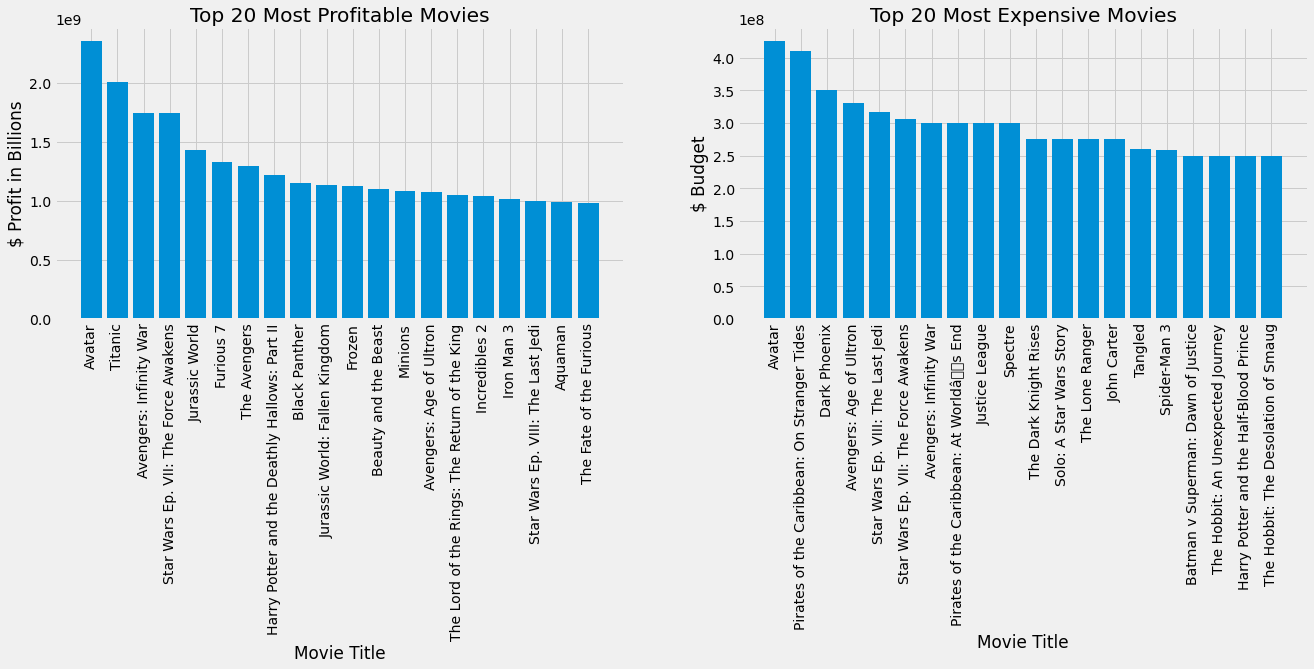

In [21]:
mpl.style.use('fivethirtyeight')

fig1, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))

# Most profitable movies

profit = budgets.sort_values('profit', ascending = False)

x1 = profit['movie'][:20]
y1 = profit['profit'][:20]

ax1.bar(x1,y1)

ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_title('Top 20 Most Profitable Movies')
ax1.set_ylabel('$ Profit in Billions')
ax1.set_xlabel('Movie Title')


# Most expensive movies

pro_budget = budgets.sort_values('production_budget', ascending = False)

x2 = pro_budget['movie'][:20]
y2 = pro_budget['production_budget'][:20]

ax2.bar(x2,y2)

ax2.tick_params(axis='x', labelrotation = 90)

ax2.set_title('Top 20 Most Expensive Movies')
ax2.set_ylabel('$ Budget')
ax2.set_xlabel('Movie Title')




Text(0, 0.5, 'Average Profit (in Billions)')

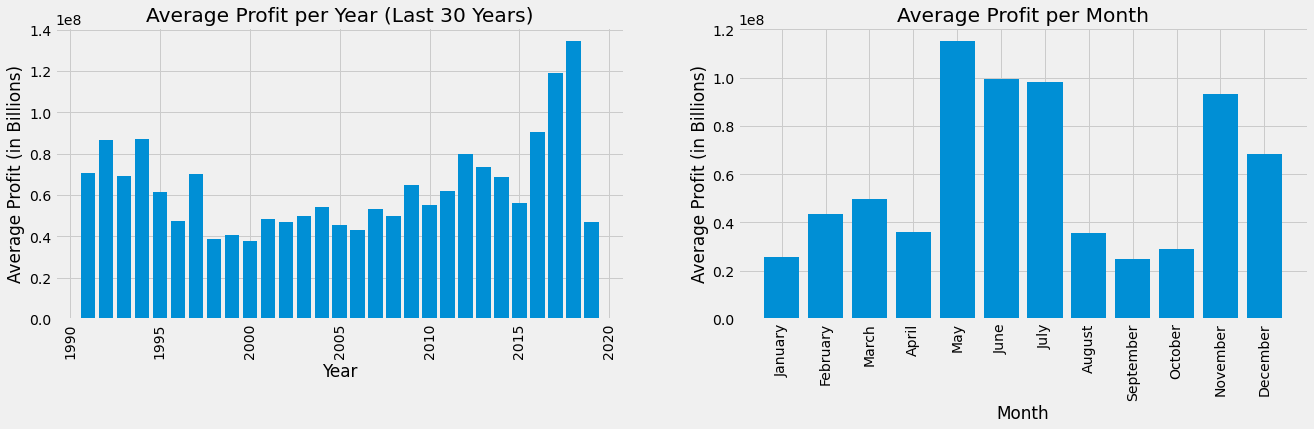

In [107]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))

#Average Profit by Year - Last 30 years excluding 2020

profit = budgets.sort_values('profit', ascending = False)

y1 = list(budgets.groupby('year')['profit'].mean().values[-30:-1])
x1 = list(budgets.groupby('year')['profit'].mean().index[-30:-1])

ax1.bar(x1,y1)


ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_title('Average Profit per Year (Last 30 Years)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Profit (in Billions)')


#Average profit by Month

y2 = budgets.groupby(['month_num','month'])['profit'].mean().values
x2 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax2.bar(x2,y2)

ax2.tick_params(axis='x', labelrotation = 90)

ax2.set_title('Average Profit per Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Profit (in Billions)')

Text(0, 0.5, 'Worldwide Revenue')

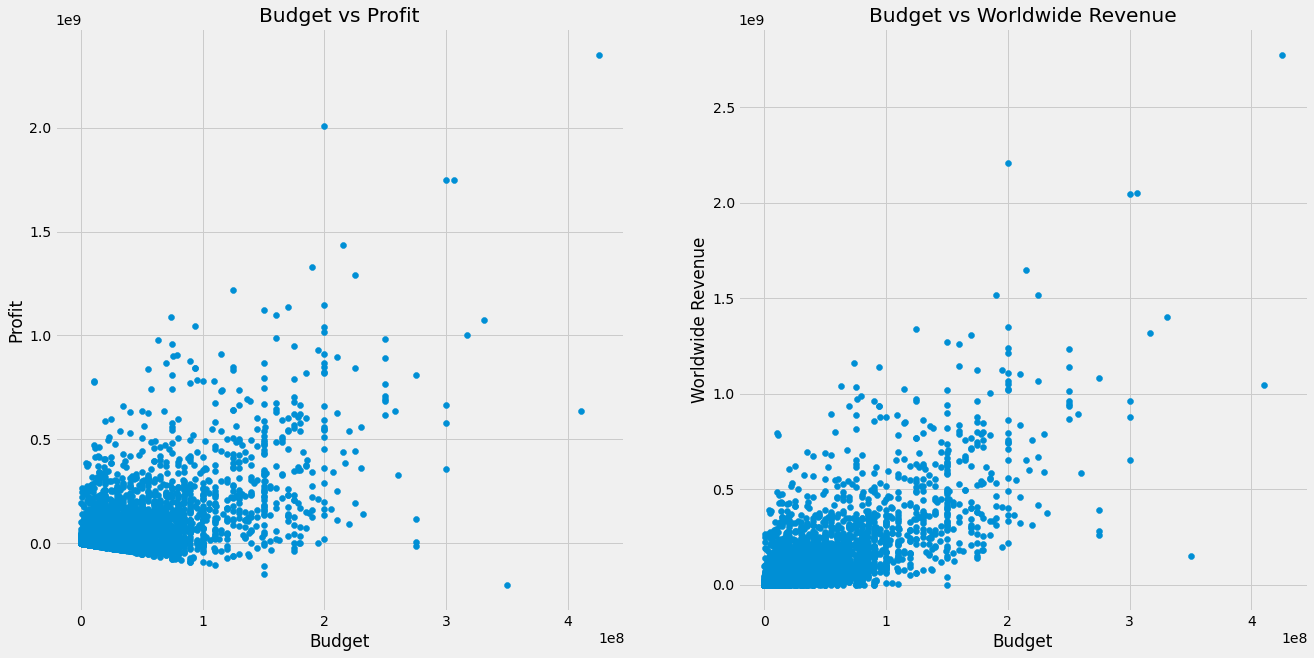

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,10))

#Budget vs Profit

y1 = budgets['profit']
x1 = budgets['production_budget']

ax1.scatter(x1,y1)

ax1.set_title('Budget vs Profit')
ax1.set_xlabel('Budget')
ax1.set_ylabel('Profit')

#Budget vs Revenue

y2 = budgets['worldwide_gross']
x2 = budgets['production_budget']


ax2.scatter(x2,y2)

ax2.set_title('Budget vs Worldwide Revenue')
ax2.set_xlabel('Budget')
ax2.set_ylabel('Worldwide Revenue')



Text(0, 0.5, 'Number of Releases')

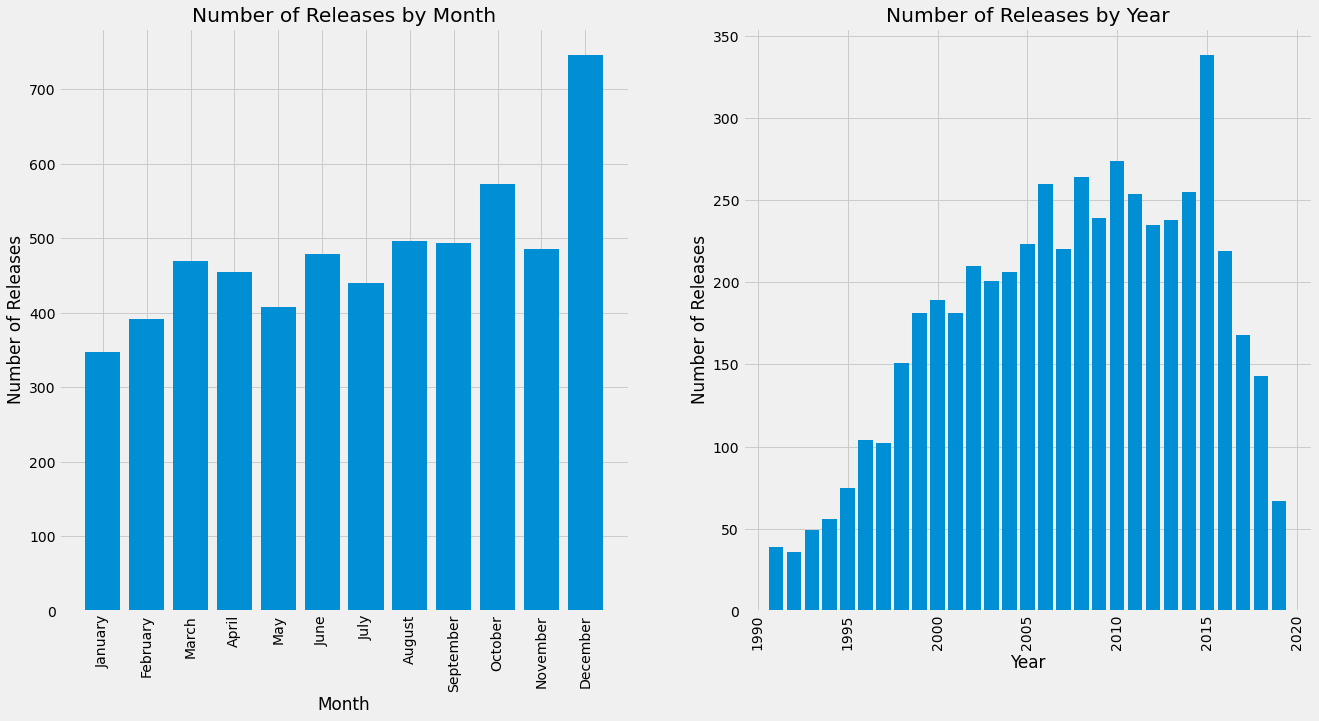

In [103]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,10))

# of releases by month

x1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y1 = budgets.groupby(['month_num','month'])['release_date'].count().values

ax1.bar(x1,y1)

ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_title('Number of Releases by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Releases')

# of releases by year

x2 = budgets.groupby(['year'])['release_date'].count().index[-30:-1]
y2 = budgets.groupby(['year'])['release_date'].count().values[-30:-1]

ax2.bar(x2,y2)

ax2.tick_params(axis='x', labelrotation = 90)

ax2.set_title('Number of Releases by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Releases')


Text(0, 0.5, 'Number of Releases')

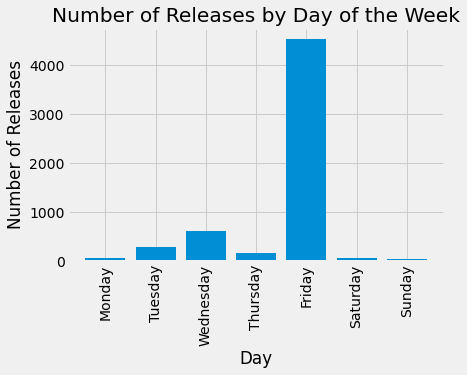

In [100]:

fig, (ax) = plt.subplots()

# of releases by day of the week

x = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
y = budgets.groupby(['day_of_week_num', 'day_of_week'])['release_date'].count().values

ax.bar(x,y)

ax.tick_params(axis='x', labelrotation = 90)

ax.set_title('Number of Releases by Day of the Week')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Releases')

# Movie Info Cleaning and EDA

In [26]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [27]:
movie_info.shape

(1560, 12)

In [28]:
# check for null values
movie_info.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [29]:
#check for duplicates
movie_info.duplicated().sum()

0

# Movies cleaning and EDA

In [30]:
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [31]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [32]:
#Check for duplicates
movies.duplicated().sum()

0

In [33]:
#Drop first column which was creating row duplicates
movies = movies.iloc[: , 1:]

In [34]:
#remove duplicates
movies.drop_duplicates(inplace = True)

In [35]:
#check for null values
movies.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [36]:
corr = movies.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,popularity,vote_average,vote_count
id,1.000000,-0.151993,0.119240,-0.134912
popularity,-0.151993,1.000000,0.057178,0.685285
vote_average,0.119240,0.057178,1.000000,0.079160
vote_count,-0.134912,0.685285,0.079160,1.000000


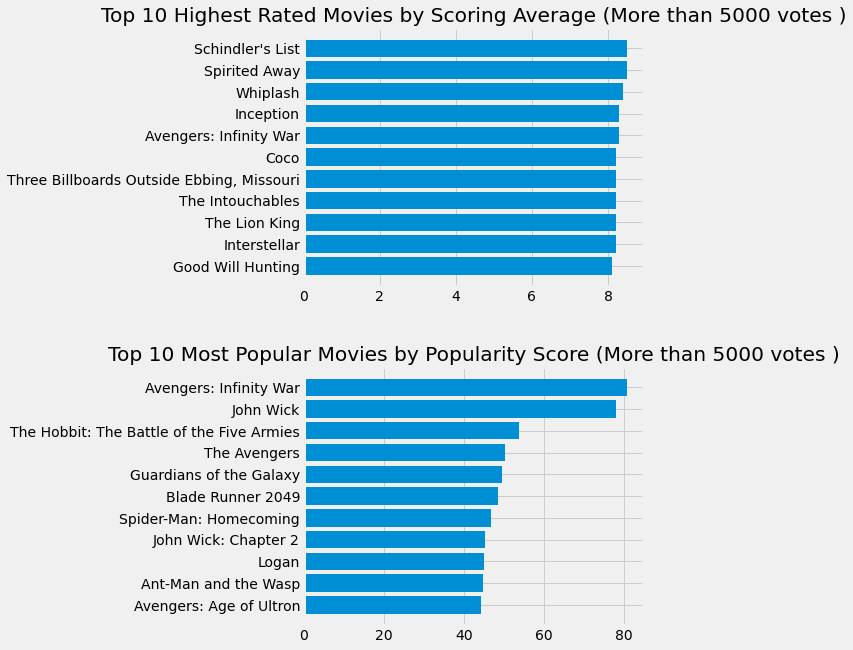

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize= (10,10))

# Highest rated movies by scoring average


scores = movies.sort_values('vote_average', ascending = False)
scores2 = scores[scores['vote_count'] > 5000]

x1 = scores2['title'][:11]
y1 = scores2['vote_average'][:11]

ax1.barh(x1,y1)
ax1.invert_yaxis()
ax1.tick_params(axis='x', labelrotation = -360)
ax1.set_title('Top 10 Highest Rated Movies by Scoring Average (More than 5000 votes )')

# This bar chart uses the popularity score column

pop = movies.sort_values('popularity', ascending = False)
pop2 = pop[pop['vote_count'] > 5000]

x2 = pop2['title'][:11]
y2 = pop2['popularity'][:11]

ax2.barh(x2,y2)
ax2.invert_yaxis()
ax2.tick_params(axis='x', labelrotation = -360)
ax2.set_title('Top 10 Most Popular Movies by Popularity Score (More than 5000 votes )')


fig.tight_layout(pad=3.0)

Text(0, 0.5, 'Vote Count')

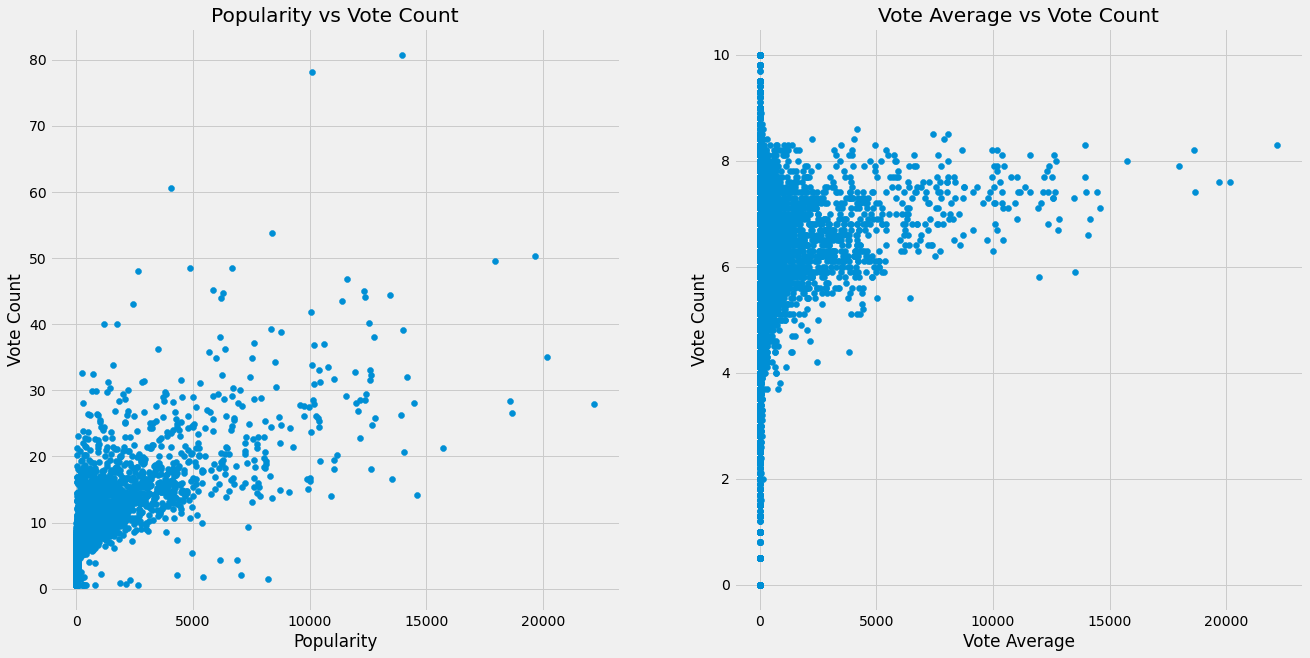

In [105]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,10))

#Popularity vs Vote Count scatter

y1 = movies['popularity']
x1 = movies['vote_count']

ax1.scatter(x1,y1)

ax1.set_title('Popularity vs Vote Count')
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Vote Count')

#Budget vs Revenue

y2 = movies['vote_average']
x2 = movies['vote_count']

ax2.scatter(x2,y2)

ax2.set_title('Vote Average vs Vote Count')
ax2.set_xlabel('Vote Average')
ax2.set_ylabel('Vote Count')

In [39]:
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


# Reviews cleaning and EDA

In [40]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [41]:
reviews.shape

(54432, 8)

In [42]:
# Lets try to merge movie_info with reviews. Both are from Rotten Tomotoes

movie_info_reviews = pd.merge(reviews, movie_info, how = 'left', on='id' )

In [43]:
#each row is a review 
movie_info_reviews.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


Text(0, 0.5, 'Number of Scores')

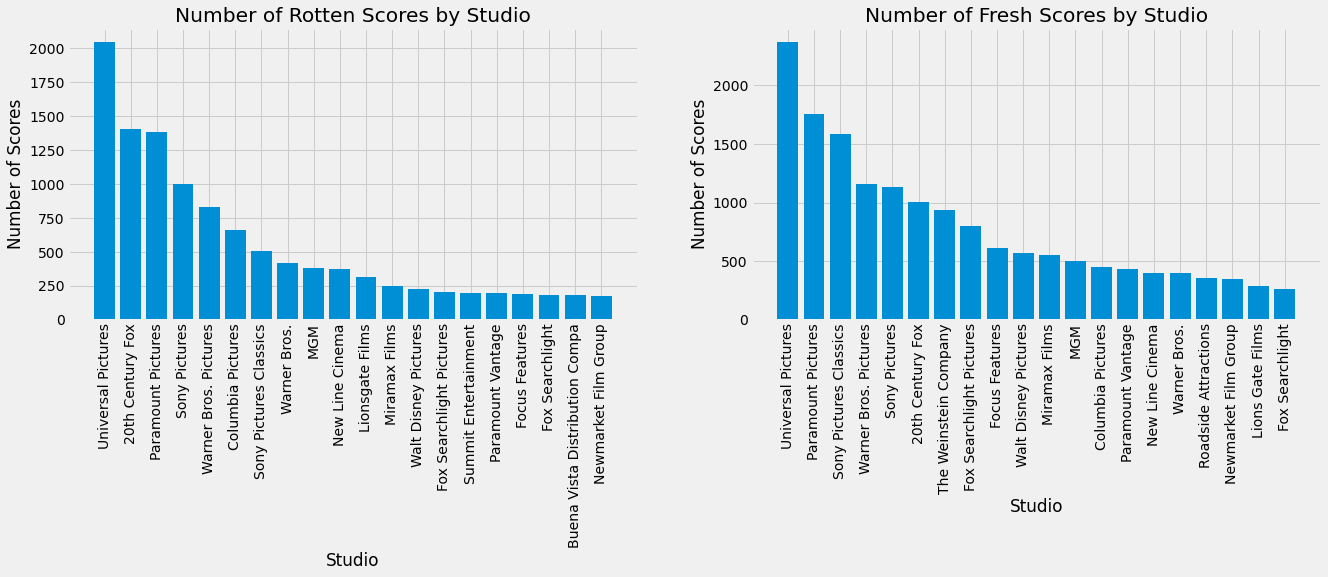

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize= (20,5))

fresh = movie_info_reviews[movie_info_reviews['fresh'] == 'fresh']
rotten = movie_info_reviews[movie_info_reviews['fresh'] == 'rotten']


#Rotten scores given by studio

x1 = rotten['studio'].value_counts().index[:20]
y1 = rotten['studio'].value_counts().values[:20]


ax1.bar(x1,y1)

ax1.tick_params(axis='x', labelrotation = 90)

ax1.set_title('Number of Rotten Scores by Studio')
ax1.set_xlabel('Studio')
ax1.set_ylabel('Number of Scores')


#Fresh Scores given by studio

x2 = fresh['studio'].value_counts().index[:20]
y2 = fresh['studio'].value_counts().values[:20]


ax2.bar(x2,y2)

ax2.tick_params(axis='x', labelrotation = 90)

ax2.set_title('Number of Fresh Scores by Studio')
ax2.set_xlabel('Studio')
ax2.set_ylabel('Number of Scores')

# Dom Gross Dataset (Brians)

In [45]:
gross = pd.read_csv('data/zippeddata/bom.movie_gross.csv')

In [46]:
gross['foreign_gross'].replace(',','', regex=True, inplace=True)

In [47]:
gross['foreign_gross'] = gross['foreign_gross'].astype(float)

In [48]:
gross['total_gross'] = gross['foreign_gross'] + gross['domestic_gross']

<BarContainer object of 10 artists>

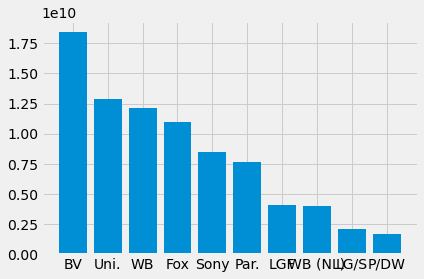

In [49]:
fig, ax = plt.subplots()

x = gross.groupby('studio')['domestic_gross'].sum().sort_values(ascending = False)[0:10].index

y = gross.groupby('studio')['domestic_gross'].sum().sort_values(ascending = False)[0:10].values

ax.bar(x,y)

<BarContainer object of 10 artists>

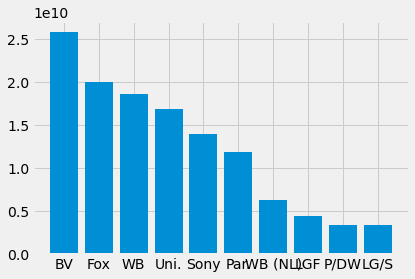

In [50]:
fig, ax = plt.subplots()

x = gross.groupby('studio')['foreign_gross'].sum().sort_values(ascending = False)[0:10].index

y = gross.groupby('studio')['foreign_gross'].sum().sort_values(ascending = False)[0:10].values

ax.bar(x,y)

<BarContainer object of 10 artists>

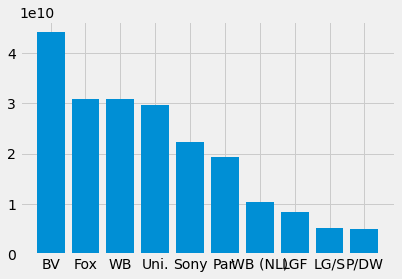

In [51]:
fig, ax = plt.subplots()

x = gross.groupby('studio')['total_gross'].sum().sort_values(ascending = False)[0:10].index

y = gross.groupby('studio')['total_gross'].sum().sort_values(ascending = False)[0:10].values

ax.bar(x,y)

In [53]:
gross[gross['studio'] == 'HC']

,title,studio,domestic_gross,foreign_gross,year,total_gross
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017,870300000.0


In [78]:
new = gross.groupby('studio')['title'].count().sort_values(ascending = False)[0:10]
new

studio
IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: title, dtype: int64

In [96]:
df1 = gross[gross['studio'].map(gross['studio'].value_counts()) > 100]
df1

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
...,...,...,...,...,...,...
3361,A Ciambra,IFC,41900.0,NaN,2018,NaN
3369,Loving Pablo,Uni.,22000.0,NaN,2018,NaN
3374,The Escape,IFC,14000.0,NaN,2018,NaN
3382,The Quake,Magn.,6200.0,NaN,2018,NaN


In [99]:
df2 = gross.groupby("studio").filter(lambda x: len(x) > 100)
df2

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08
...,...,...,...,...,...,...
3361,A Ciambra,IFC,41900.0,NaN,2018,NaN
3369,Loving Pablo,Uni.,22000.0,NaN,2018,NaN
3374,The Escape,IFC,14000.0,NaN,2018,NaN
3382,The Quake,Magn.,6200.0,NaN,2018,NaN


<BarContainer object of 10 artists>

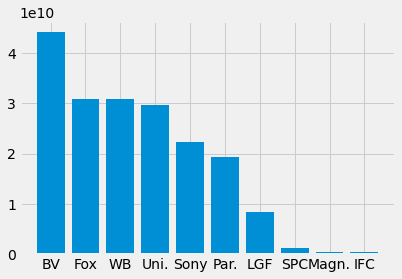

In [84]:
fig, ax = plt.subplots()

x = df1.groupby('studio')['total_gross'].mean().sort_values(ascending = False)[0:10].index
y = df1.groupby('studio')['total_gross'].mean().sort_values(ascending = False)[0:10].values

ax.bar(x,y)